Step 1: Create term-test-1-result.csv

In [1]:
import pandas as pd
import numpy as np

# Generate random data for 50 students
np.random.seed(42)
registration_numbers = [f'REG{i:03d}' for i in range(1, 51)]
names = [f'Student{i}' for i in range(1, 51)]
tt1_marks = np.random.randint(0, 21, 50)  # Random marks between 0 and 20

# Create DataFrame
df_tt1 = pd.DataFrame({
    'Registration Number': registration_numbers,
    'Name': names,
    'TT-1 Marks': tt1_marks
})

# Save to CSV
df_tt1.to_csv('term-test-1-result.csv', index=False)

Step 2: Creating term-test-2-result.csv

In [2]:
# Generate random data for TT-2 marks
tt2_marks = np.random.randint(0, 21, 50)  # Random marks between 0 and 20

# Create DataFrame
df_tt2 = pd.DataFrame({
    'Registration Number': registration_numbers,
    'Name': names,
    'TT-2 Marks': tt2_marks
})

# Save to CSV
df_tt2.to_csv('term-test-2-result.csv', index=False)

Step 3: Load and Merge DataFrames

In [3]:
# Load CSV files
df_tt1 = pd.read_csv('term-test-1-result.csv')
df_tt2 = pd.read_csv('term-test-2-result.csv')

# Merge DataFrames on 'Registration Number'
df_merged = pd.merge(df_tt1, df_tt2, on=['Registration Number', 'Name'])

Step 4: Create New Columns

In [4]:
# Create 'Best Marks' column
df_merged['Best Marks'] = df_merged[['TT-1 Marks', 'TT-2 Marks']].max(axis=1)

# Create 'Average Marks' column
df_merged['Average Marks'] = df_merged[['TT-1 Marks', 'TT-2 Marks']].mean(axis=1)

Step 5: Drop Unnecessary Columns

In [5]:
# Drop 'TT-1 Marks' and 'TT-2 Marks' columns
df_merged = df_merged.drop(columns=['TT-1 Marks', 'TT-2 Marks'])

Step 6: Create Attendance and Term Final Marks CSV

In [6]:
# Generate random data for attendance and term final marks
attendance_marks = np.random.randint(0, 11, 50)  # Random marks between 0 and 10
term_final_marks = np.random.randint(0, 101, 50)  # Random marks between 0 and 100

# Create DataFrame
df_final = pd.DataFrame({
    'Registration Number': registration_numbers,
    'Attendance Marks': attendance_marks,
    'Term Final Marks': term_final_marks
})

# Save to CSV
df_final.to_csv('attendance-term-final.csv', index=False)

# Load the CSV file
df_final = pd.read_csv('attendance-term-final.csv')

# Merge with the latest term test dataframe
df_final_merged = pd.merge(df_merged, df_final, on='Registration Number')

# Create 'Final Marks' column
df_final_merged['Final Marks'] = df_final_merged['Term Final Marks'] * 0.7 + df_final_merged['Average Marks'] + df_final_merged['Attendance Marks']

Step 7: Save to final result.csv

In [7]:
# Save the final DataFrame to CSV
df_final_merged.to_csv('final result.csv', index=False)

Step 8: K-Means Clustering and Visualization

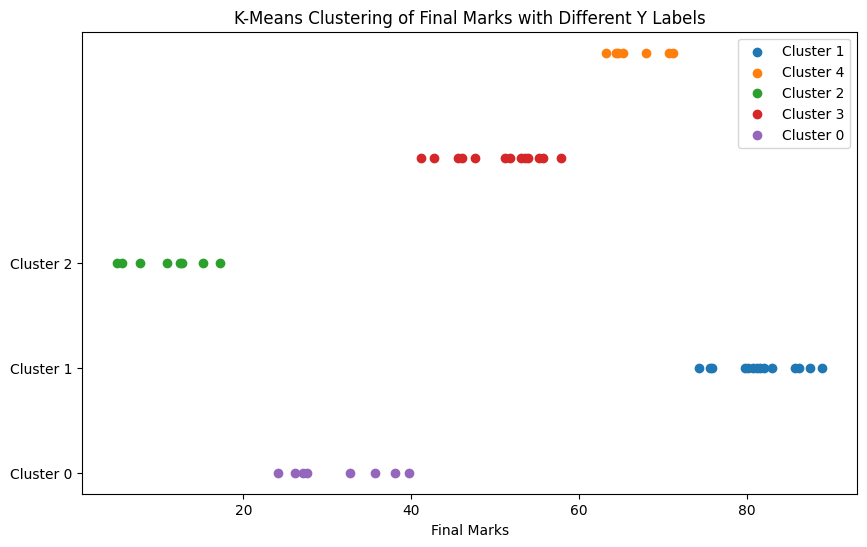

In [11]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the final result CSV
df_final_result = pd.read_csv('final result.csv')

# Extract 'Final Marks' for clustering
X = df_final_result[['Final Marks']]

# Perform K-Means clustering with K=3
kmeans = KMeans(n_clusters=5, random_state=42)
df_final_result['Cluster'] = kmeans.fit_predict(X)

# Assign different y-values for each cluster
y_values = df_final_result['Cluster'] * 0.1  # Adjust the multiplier for spacing

# Visualize the clusters with different y labels
plt.figure(figsize=(10, 6))
for cluster in df_final_result['Cluster'].unique():
    plt.scatter(df_final_result[df_final_result['Cluster'] == cluster]['Final Marks'],
                y_values[df_final_result['Cluster'] == cluster],
                label=f'Cluster {cluster}')

plt.xlabel('Final Marks')
plt.yticks([0, 0.1, 0.2], ['Cluster 0', 'Cluster 1', 'Cluster 2'])  # Set y-ticks to cluster labels
plt.title('K-Means Clustering of Final Marks with Different Y Labels')
plt.legend()
plt.show()